# Propriedades da Convolução

A convolução possui várias propriedades que são úteis tanto para o melhor entendimento
do seu funcionamento como de uso prático. Aqui são ilustradas três propriedades: translação
por impulso, resposta ao impulso e decomposição do núcleo da convolução.

## Translação por um impulso

Quando o núcleo da composição é composto de apenas um único valor um e os demais zeros, a
imagem resultante será a translação da imagem original pelas coordenadas do valor não zero do núcleo.
No exemplo a seguir, o núcleo da convolução consiste do valor 1 na coordenada (19,59). Assim, a imagem
resultante ficara deslocada de 19 pixels para baixo e 59 para a direita. Observe que como estamos
tratando as imagens como infinitas com valores zeros fora do retângulo da imagem, esta translação faz
com que o retângulo da imagem aumente e vários valores iguais a zero sejam agora visíveis.

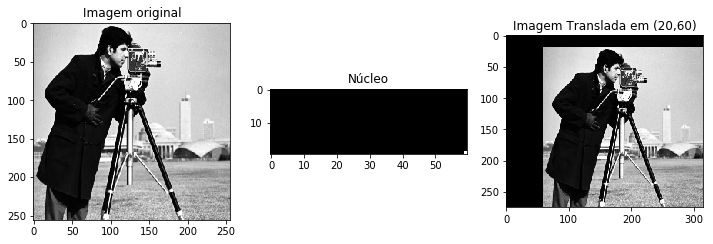

In [11]:
#import ia636 as ia

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
data = os.path.abspath('/etc/jupyterhub/ia898_1s2017/ia898/data/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia


f = plt.imread(data+'/cameraman.tif')
h = np.zeros((20,60))
h[19,59] = 1
g = ia.conv(f,h)

plt.figure(1,figsize=(12,12))
plt.subplot(131)
plt.imshow(f, cmap="gray")
plt.title('Imagem original')
plt.subplot(132)
plt.imshow(h, cmap="gray")
plt.title('Núcleo')
plt.subplot(133)
plt.imshow(g, cmap="gray")
plt.title('Imagem Translada em (20,60)')

Se invertemos a posição o núcleo ( ou sejá, o valor vai para a coordenada (0,0)) a translação também é invertida, gerando os deslocamentos de 19 píxeis para cima e 59 píxeis para a esquerda.

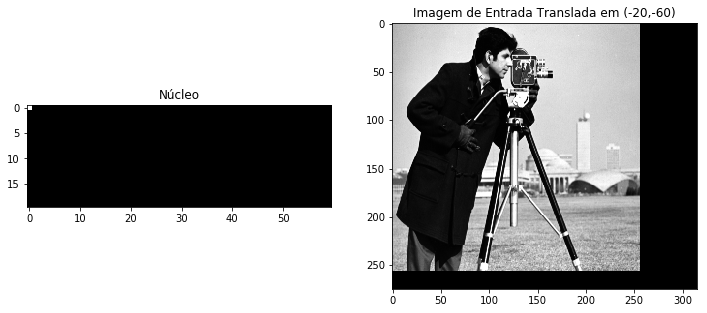

In [12]:
h2 = np.zeros((20,60))
h2[0,0] = 1
g2 = ia.conv(f,h2)

plt.figure(2,figsize=(12,12))
plt.subplot(121)
plt.imshow(h2, cmap="gray")
plt.title('Núcleo')
plt.subplot(122)
plt.imshow(g2, cmap="gray")
plt.title('Imagem de Entrada Translada em (-20,-60)')

Como é possível perceber, o deslocamento da imagem depende da posição do valor 1 no núcleo. Por exemplo, se o valor 1 estiver no centro de um núcleo de dimensões (41,41), ou seja, o núcleo valor 1 está na posição (20,20), a imagem de saída sofrerá deslocamento de 20 píxeis em todas as direções.

dimensão da imagem original:  (256, 256)
dimensão da imagem transladada:  (296, 296)


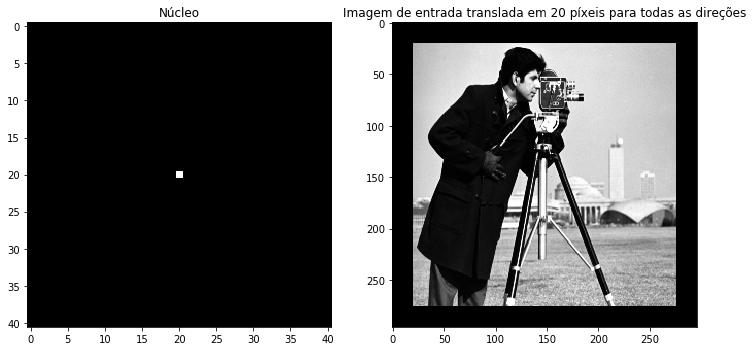

In [13]:
h3 = np.zeros((41,41))
h3[20,20] = 1
g3 = ia.conv(f,h3)

plt.figure(3,figsize=(12,12))
plt.subplot(121)
plt.imshow(h3, cmap="gray")
plt.title('Núcleo')
plt.subplot(122)
plt.imshow(g3, cmap="gray")
plt.title('Imagem de entrada translada em 20 píxeis para todas as direções')
print("dimensão da imagem original: ",f.shape)
print("dimensão da imagem transladada: ",g3.shape)

Resposta ao impulso
===================

Quando a imagem é formada por um único pixel de valor 1, o resultado da convolução é o núcleo da convolução.
Esta propriedade permite que se visualize o núcleo da convolução. Se você souber que existe algum software que
possui um filtro linear invariante à translação e você não sabe qual é o seu núcleo, basta aplicá-lo numa imagem
com um único pixel igual a 1. O resultado do filtro revelará o seu núcleo. Na ilustração a seguir, uma imagem
com vários impulsos é criada utilizando a função `ia636:iacomb`. É possível visualizar o núcleo sendo repetido
em cada lugar do impulso. O núcleo da convolução utilizado aqui é o Laplaciano da Gaussiana (LoG) `ia636:ialog`.

In [14]:
# Funções iacomb e ialog retiradas da ia636 do Adessowiki

def iacomb(s, delta, offset):
    s = np.array(s)
    if np.prod(s.shape) == 1:
        g = zeros(s)
        g[offset::delta] = 1
    elif s.size >= 2:
        g = np.zeros((s[0], s[1]))
        g[offset[0]::delta[0], offset[1]::delta[1]] = 1
    if s.size == 3:
        aux = zeros(s)
        for i in range(offset[2], s[2], delta[2]):
            aux[:,:,i] = g
        g = aux
    return g
        

def ialog(s, mu, sigma):
    mu = np.array(mu)
    s  = np.array(s)
    if np.product(np.shape(s)) == 1:
        x = np.arange(s)
        coord_center = (x-mu)**2
    else:
        (rr, cc) = np.indices(s)
        coord_center = (rr-mu[0])**2  + (cc-mu[1])**2
    gauss_factor = coord_center/(2.*sigma**2)
    gauss_factor_r = np.ravel(gauss_factor)
    exp_factor = np.exp(-gauss_factor_r)
    exp_factor = exp_factor.reshape( np.shape(coord_center))
    g = -(((1 - gauss_factor )/ (sigma**4 * np.pi)) * exp_factor)
    
    return g

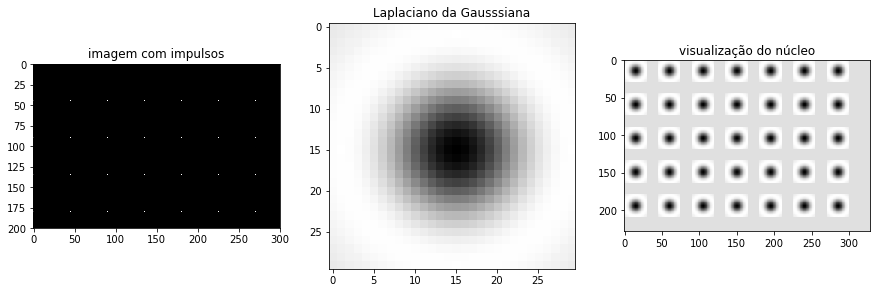

In [15]:
c = iacomb((200,300), (45,45), (0,0))
hL = ialog((30,30), [15,15], (7))
cL = ia.conv(c,hL)

plt.figure(2, figsize=(15,15))
plt.subplot(131)
plt.imshow(ia.normalize(c), cmap="gray")
plt.title('imagem com impulsos')
plt.subplot(132)
plt.imshow(ia.normalize(hL), cmap="gray")
plt.title('Laplaciano da Gausssiana')
plt.subplot(133)
plt.imshow(ia.normalize(cL), cmap="gray")
plt.title('visualização do núcleo')


O núcleo da LoG visualizado acima é aplicado numa imagem real para ilustrar o seu comportamento:

""
filtragem pelo LoG

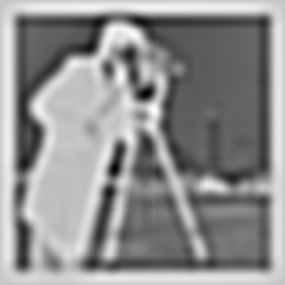

In [16]:
gL = ia.conv(f,hL)
ia.adshow(ia.normalize(gL), 'filtragem pelo LoG')

### Exemplo numérico com kernel aleatório:

In [17]:
randK = np.random.randint(255, size=(12, 12)) # Núcleo desconhecido
f2 = np.array([1]) # Impulso
cL2 = ia.conv(f2,randK) # convolução entre o impulso e o Núcleo  desconhecido

print("valores do núcleo:\n", cL2)

valores do núcleo:
 [[  20.   44.  136.   63.   32.   20.  143.  195.  218.  105.  132.  230.]
 [ 163.   13.  211.  206.  107.   19.   63.  167.  131.  124.  187.  168.]
 [ 180.  225.  248.  204.  139.  209.  227.   93.    7.    8.   61.  151.]
 [  32.  237.   41.    4.  192.  106.  247.  130.  141.  157.  188.  136.]
 [ 153.  177.  199.   45.  251.  104.  112.  218.  139.   55.   51.   71.]
 [  65.  106.   50.  106.  135.  123.   60.  165.  127.   63.  203.   77.]
 [ 149.  180.  180.   86.  159.  246.   51.  117.  168.  168.   40.   14.]
 [   0.   30.   85.   78.  205.   56.   68.  145.   38.  123.  242.   48.]
 [ 225.  131.  148.  200.  236.   47.   73.  236.  230.   99.  151.  147.]
 [  20.   48.  107.    7.  160.  178.  188.  159.   40.  107.  114.  189.]
 [ 214.  238.  196.  187.  196.   67.  187.    5.  119.   11.  206.  155.]
 [ 157.  117.  244.  124.  185.   83.   80.   54.  154.   90.  103.  235.]]


Decomposição
============

A propriedade da associatividade da convolução é dada por:


  $$ f * h_{eq} = f * (h1 * h2) = (f * h1) * h2 $$

Se conseguirmos decompor um núcleo de modo que ele seja o resultado da convolução de dois núcleos mais simples, esta propriedade
permite um ganho computacional se a convolução for aplicada por cada núcleo separadamente. A seguir é ilustrado o caso do núcleo
que faz a soma dos pixels numa janela quadrada de 10 pixels de lado. Se a convolução for feita com o quadrado 10 x 10, serão 100
operações feitas na convolução. Se o núcleo for decomposto em dois núcleos uma linha e uma coluna de 10 pixels cada, cada convolução
precisará de 10 operações, totalizando 20 operações ao todo. Observe a diferença no tempo de processamento destes dois casos.

In [18]:
#f = adreadgray('cameraman.tif')
f = plt.imread(data+'/cameraman.tif')
h1 = np.ones((1,10))
h2 = np.ones((10,1))

h = ia.conv(h1,h2)
print ('h=\n',h)
print ('h1=\n',h1)
print ('h2=\n',h2)


f1 = ia.conv(f,h)
print ('Tempo de processamento 10 x 10 (h):')
%timeit ia.conv(f,h)

f2 = ia.conv(f,h1)
f3 = ia.conv(f2,h2)
print ('Tempo de processamento 10 horizontal (h1) e 10 vertical (h2):')
%timeit ia.conv(f,h1);ia.conv(f2,h2) 

h=
 [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
h1=
 [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
h2=
 [[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
Tempo de processamento 10 x 10 (h):
10 loops, best of 3: 26.7 ms per loop
Tempo de processamento 10 horizontal (h1) e 10 vertical (h2):
100 loops, best of 3: 4.12 ms per loop


""
filtragem pela soma na janela 10x10

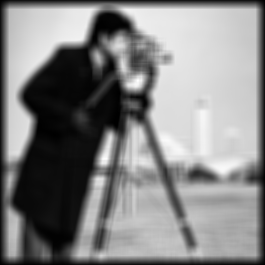

f1 é igual f3? True


In [19]:
ia.adshow(ia.normalize(f1), 'filtragem pela soma na janela 10x10')
print ('f1 é igual f3?', abs(f1-f3).max() < 10E-4)

Para gerar um núcleo basta mutiplicar um vetor coluna e um vetor linha que tenha o mesmo número de elementos.

In [20]:
h1 = np.array([[-1],[2],[-1]])
h2 = np.array([[-1,2,-1]])

h = h1.dot(h2)
print("vetor coluna:\n",h1)
print("vetor linha:\n",h2)
print("núcleo resultante\n", h)

vetor coluna:
 [[-1]
 [ 2]
 [-1]]
vetor linha:
 [[-1  2 -1]]
núcleo resultante
 [[ 1 -2  1]
 [-2  4 -2]
 [ 1 -2  1]]


Verificaremos que o custo de computacional das operações cai com a dimensão do núcleo:

In [21]:
f1 = ia.conv(f,h)
print ('Tempo de processamento para p núcelo 3 x 3 (h):')
%timeit ia.conv(f,h)

f2 = ia.conv(f,h1)
f3 = ia.conv(f2,h2)
print ('Tempo de processamento os núcleos h1 e h2')
%timeit ia.conv(f,h1);ia.conv(f2,h2) 

Tempo de processamento para p núcelo 3 x 3 (h):
100 loops, best of 3: 2.45 ms per loop
Tempo de processamento os núcleos h1 e h2
1000 loops, best of 3: 1.38 ms per loop


Referências
============

- `ia636:iacomp ia636:iacomb Comb impulses`
- `ia636:ialog ia636:ialog Laplacian of a Gaussian`